![Logo](https://github.com/Columbia-Neuropythonistas/IntroPythonForNeuroscientists2023/assets/65978061/138766b5-ac36-4dc8-b9d4-bf512ecebe78)

# **Week 8: Data Visualization and Object-Oriented Programming**

## Data Visualization first, with *real data!*
We'll begin today by loading in some (real!) data. Before we do that though, we need to import some packages.

In [1]:
#remember that when we use 'as', we are simply telling Python what term we want to refer to our imported packages by
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#this does some important stuff behind the scenes for plotting specifically for jupyter notebooks (same in vscode), ask us if you want to learn more!
%matplotlib inline 


Now, let's load and examine our data!

In [2]:
data = pd.read_csv('SST_data.csv')
data

,dF/F,time_from_stim,cell_id,exposure,trial_id,omitted,pupil_area,mean_response
0,0.213396,-1.228129,1086500633,familiar,24,False,5636.081391,0.055830
1,-0.096333,-1.195810,1086500633,familiar,24,False,5636.081391,0.055830
2,-0.117812,-1.163491,1086500633,familiar,24,False,5636.081391,0.055830
3,0.096526,-1.131172,1086500633,familiar,24,False,5636.081391,0.055830
4,-0.000783,-1.098852,1086500633,familiar,24,False,5636.081391,0.055830
...,...,...,...,...,...,...,...,...
689770,-0.116568,1.357393,1086500770,novel,4802,False,7985.740772,-0.040271
689771,-0.011238,1.389711,1086500770,novel,4802,False,7985.740772,-0.040271
689772,0.057402,1.422030,1086500770,novel,4802,False,7985.740772,-0.040271
689773,0.114362,1.454349,1086500770,novel,4802,False,7985.740772,-0.040271


This dataset is borrowed from [Neuromatch Academy](https://compneuro.neuromatch.io/projects/neurons/README.html), but this is very much real data, generated by the Allen Institute! Briefly, what you see here are two-photon calcium imaging signals from a single mouse performing a visual change detection task. I've curated this dataset just a little bit, so we're only looking at SST-expressing interneurons. To better understand what's going on here, let's traverse this dataframe a little bit.

P.S. If you want to learn more about the dataset, check out the youtube video in the NMA link!

In [3]:
#You can index dataframes using .COLUMN_NAME or by using brackets: [COLUMN_NAME] - Pandas is very flexible!
data.cell_id.unique()

array([1086500633, 1086500392, 1086500770, 1086500872, 1086499783,
       1086499911, 1086500092, 1086500297, 1086501106, 1086501010,
       1086499499, 1086500194, 1086499628])

In [5]:
singlecell_trial_data = data[(data.trial_id == 24) & (data.cell_id == 1086500633)]
singlecell_trial_data

,dF/F,time_from_stim,cell_id,exposure,trial_id,omitted,pupil_area,mean_response
0,0.213396,-1.228129,1086500633,familiar,24,False,5636.081391,0.05583
1,-0.096333,-1.195810,1086500633,familiar,24,False,5636.081391,0.05583
2,-0.117812,-1.163491,1086500633,familiar,24,False,5636.081391,0.05583
3,0.096526,-1.131172,1086500633,familiar,24,False,5636.081391,0.05583
4,-0.000783,-1.098852,1086500633,familiar,24,False,5636.081391,0.05583
...,...,...,...,...,...,...,...,...
80,-0.076015,1.357406,1086500633,familiar,24,False,5636.081391,0.05583
81,0.017808,1.389725,1086500633,familiar,24,False,5636.081391,0.05583
82,-0.085116,1.422044,1086500633,familiar,24,False,5636.081391,0.05583
83,-0.176912,1.454364,1086500633,familiar,24,False,5636.081391,0.05583


Ok, now that we've examined the dataset a little bit, let me provide some documentation:

`dF/F` is the instantaneous calcium imaging signal <br>
`time_from_stim` is the timepoint of each row of data, aligned to an image presentation <br>
`cell_id` self explanatory I hope <br>
`exposure` whether the image for a a trial was familiar or novel  <br>
`trial_id` each image presentation is a separate trial <br>
`omitted` whether a trial had an omitted image <br>
`pupil_area` measured 500ms after stimulus presntation <br>
`mean_response` average dF/F over the 500ms following image presentation <br>

### When do I use matplotlib, and when do I use seaborn?

Think of matplotlib as a basic set of tools with which to build plots in Python. Often times, we just quickly want to visualize data, which could be as simple as an array/vector of points. Matplotlib is amazing at this.

In [6]:
single_trial_data = data[(data.trial_id == 605) & (data.cell_id == 1086500092)]
single_trial_trace = np.array(single_trial_data['dF/F'])
single_trial_trace

array([ 0.        , -0.00496857,  0.00674423, -0.01763263, -0.04761156,
        0.08080438, -0.07205429, -0.00055223,  0.06000325, -0.1114908 ,
        0.05540281, -0.02635718,  0.0029113 ,  0.04146674, -0.00243199,
        0.01709818, -0.13901514, -0.12144603, -0.06014833, -0.04648617,
        0.06432796, -0.05723911, -0.01201382,  0.1456255 ,  0.08782762,
        0.20943731,  0.06826705, -0.05812632, -0.04514774, -0.01683397,
        0.1182166 ,  0.1507158 ,  0.03490584, -0.13279231, -0.06884541,
       -0.09240516, -0.08629911, -0.04207015, -0.03112201, -0.09212433,
        0.        ,  0.03379494, -0.04013482,  0.00201452, -0.13413554,
       -0.015636  , -0.01559674,  0.04832751, -0.03531285,  0.11599413,
       -0.00475846, -0.00955742, -0.03567727,  0.03658258,  0.05781025,
        0.0681921 , -0.13838767,  0.00517592, -0.13026594, -0.11078066,
       -0.07357377, -0.09089381, -0.11607467, -0.04319401, -0.09791592,
        0.01013106, -0.06501874, -0.04850751,  0.11253423, -0.04

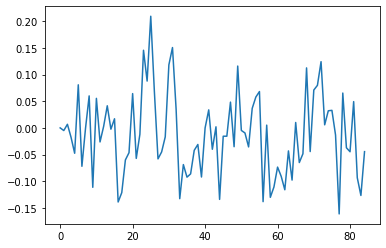

In [7]:
plt.plot(single_trial_trace)

What other quick functionality might we want here?

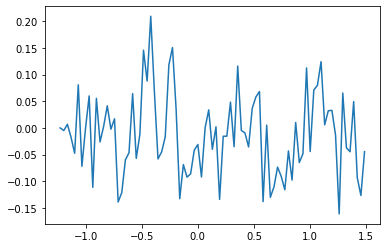

In [8]:
single_trial_timepoints = np.array(single_trial_data['time_from_stim'])
plt.plot(single_trial_timepoints, single_trial_trace)

Ok, this is great, but we have tons of data! What if we want to plot that?

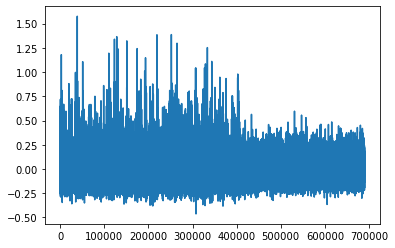

In [9]:
plt.plot(data['dF/F'])

That isn't very useful ... We could go through and organize our dataframe, take some averages, and then do a lot of work to make the plot look pretty, but it would be way easier if something did that automatically ...

## Plotting data with Seaborn

One thing that's important to note about our dataset is that it's long-form, not wide (e.g. column labels don't correspond to time, but rather, each row represents a separate single observation). While this may seem confusing at first, it makes things intensely convenient when we use **Seaborn**, a plotting package that's built on top of matplotlib.

<AxesSubplot:xlabel='time_from_stim', ylabel='dF/F'>

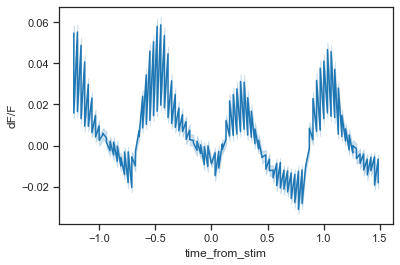

In [10]:
#ignore this for now, it just makes things look good
sns.set_style("ticks")
sns.set_context("notebook")

sns.lineplot(data = data, x = 'time_from_stim', y = 'dF/F')

Seaborn is super simple to use! We pass in a dataframe, and then specify what we want to plot on the x-axis, and what we want to plot on the y-axis, using labels from the dataframe.

What if we want our x-axis to be categorical instead? Let's google a solution! We can use **documentation** to understand how to use Seaborn. [Let's go!](https://seaborn.pydata.org/)

<AxesSubplot:xlabel='exposure', ylabel='pupil_area'>

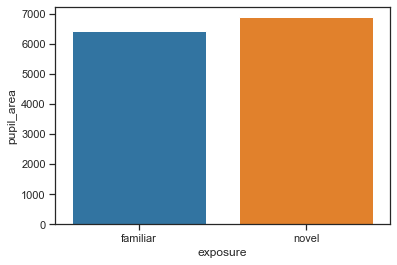

In [12]:
sns.barplot(data=data, x='exposure', y='pupil_area')

## Problem 1
Make a barplot, but instead of using mean response data, plot pupil size instead. As a challenge, try to adjust the y-axis to bring out the difference between familiar and novel. Use google to find a solution!

(5000.0, 7000.0)

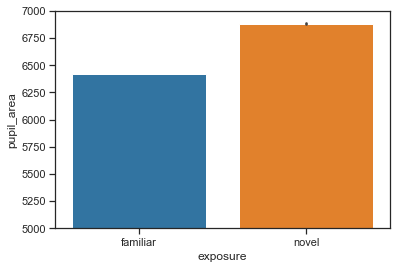

In [16]:
sns.barplot(data=data, x='exposure', y='pupil_area' )
plt.ylim(5000,7000)

## Splitting up data in Seaborn
What if we want to split up our lineplot by familiar and novel trials? Seaborn makes this super easy by allowing you to pass a label to `hue`.

<AxesSubplot:xlabel='time_from_stim', ylabel='dF/F'>

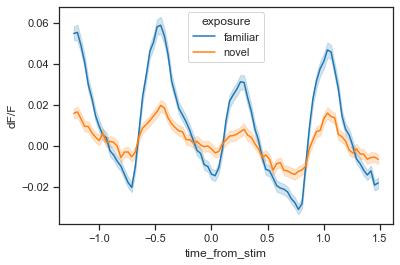

In [17]:
sns.lineplot(data = data, x = 'time_from_stim', y = 'dF/F', hue = 'exposure')

Notice how seaborn always includes error intervals? We can turn thes off if we'd like, but let's leave them be for now. Let's now check the documentation to find other ways to split up data.

<AxesSubplot:xlabel='time_from_stim', ylabel='dF/F'>

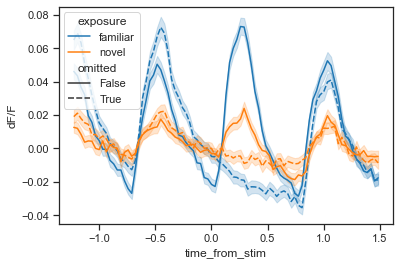

In [18]:
sns.lineplot(data = data, x = 'time_from_stim' , y = 'dF/F', hue = 'exposure', style = 'omitted')

## Problem 2
1) Can you figure out how to make a histogram of pupil area in Seaborn? Here's some edited data for you to use. <br>
2) Once you do this, can you figure out how to split the histogram by `exposure`? <br>
3) CHALLENGE: If you have more time, play around with your plot! Be creative and see what else you can add to your histogram, using the documentation as a guide.

In [19]:
data_sample = data.sample(1000)


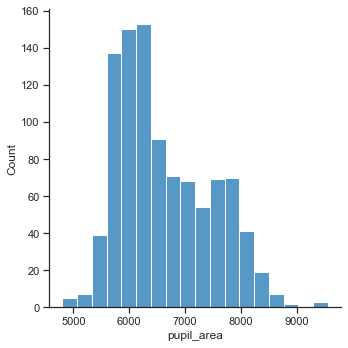

In [22]:
sns.displot(data_sample,x='pupil_area')

<AxesSubplot:xlabel='pupil_area', ylabel='Count'>

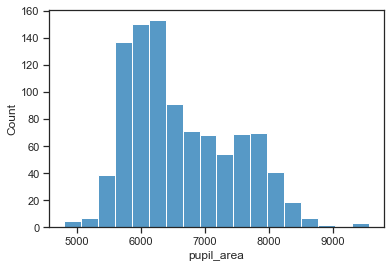

In [23]:
sns.histplot(data_sample,x='pupil_area')

<AxesSubplot:xlabel='pupil_area', ylabel='Count'>

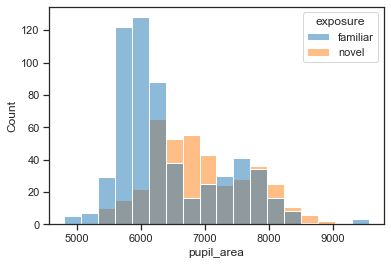

In [27]:
sns.histplot(data_sample,x='pupil_area', hue='exposure')

### Saving Figures
Saving figures can be tricky at times. You have to specify a high DPI (>100, depends on the size of your plot) if you want decent resolution, and sometimes axes can get lopped off.

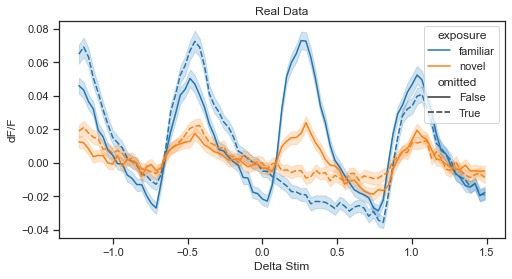

In [28]:
plt.figure(figsize=(8,4))
sns.lineplot(data = data, x = 'time_from_stim' , y = 'dF/F', hue = 'exposure', style = 'omitted')
plt.xlabel('Delta Stim')
plt.ylabel('dF/F')
plt.title('Real Data')

plt.savefig('my_figure.png', dpi = 300)

Oh no! Our axes, it's broken!

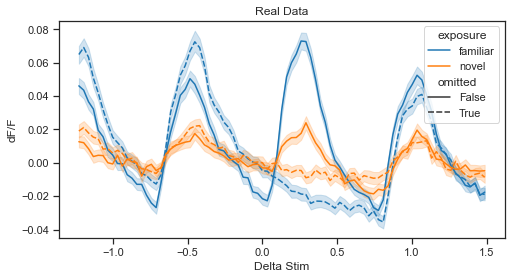

In [29]:
plt.figure(figsize=(8,4))
sns.lineplot(data = data, x = 'time_from_stim' , y = 'dF/F', hue = 'exposure', style = 'omitted')
plt.xlabel('Delta Stim')
plt.ylabel('dF/F')
plt.title('Real Data')
#use this bbox_inches command to fix things
plt.savefig('my_figure.png', dpi = 300, bbox_inches = 'tight')

## Object-Oriented Programming (OOP)

**Object-oriented programming** is a style of programming that is used heavily in Python packages. To understand waht it is, let's understand what it's not: **functional programming**.

In [30]:
#imports
from datetime import date
from abc import ABC, abstractmethod
import numpy as np
import pandas as pd

This is functional-style code - take just a few minutes to guess what this will output.

In [31]:
abhi = {'name': 'Abhi',
        'units': [6,7,8],
        'cblind': True}

sharon = {'name': 'Sharon',
        'units': [1,2],
        'cblind': False}

def print_teacher_info(teacher):
    if teacher['cblind']:
        cblind = 'is'
    else:
        cblind = 'is NOT'
    print(teacher['name'] + ' is teaching units ' + str(teacher['units']) + ' and ' + cblind + ' colorblind!')
    
print_teacher_info(abhi)
print_teacher_info(sharon)

Abhi is teaching units [6, 7, 8] and is colorblind!
Sharon is teaching units [1, 2] and is NOT colorblind!


In [32]:
#ENTER YOUR GUESS HERE, AND THEN RUN THE CODE ABOVE TO CHECK

Now, let's look at an OOP example of the same code.

In [33]:
class Teacher:
    
    def __init__(self, name, units, colorblind):
        self.name = name
        self.units = units
        self.colorblind = colorblind
        
    def print_teacher_info(self):
        if self.colorblind:
            cblind = 'is'
        else:
            cblind = 'is NOT'
        print(self.name + ' is teaching units ' + str(self.units) + ' and ' + cblind + ' colorblind!')
        
abhi = Teacher('Abhi', [7,8,9], True)
sam = Teacher('Sam', [4,5,6], False)
abhi.print_teacher_info()
sam.print_teacher_info()

Abhi is teaching units [7, 8, 9] and is colorblind!
Sam is teaching units [4, 5, 6] and is NOT colorblind!


#### What is OOP?
At it's root, OOP is about encapsulation and modularity. We'll go over the specifics in the lesson today!


As you can see, it is possible to use both functional and OOP coding styles in Python. Today, we're going to go over exactly what OOP is, what it's useful for, and how to read OOP code.

### Classes and objexts
We've actually already used OOP before! For example, does the code below look familiar?

In [34]:
df = pd.DataFrame([1,2,3])

In this code, df is an **object**, defined in the DatFrame **class**. Confusing?

Let's use an analogy: the class is a recipe, and the object is the food you make using that recipe.
In fact, almost everything in Python is an object. For example:

In [35]:
a = 3.1
b = int(3)
print(type(a))
print(type(b))

<class 'float'>
<class 'int'>


See how it says class? What do we think type (df) will return?

In [36]:
type(df)

pandas.core.frame.DataFrame

#### Example class code
Now let's go over how to use classes and objects in detail. Run the code below to load in our custom `Experiment` class. Remember that this class is like a recipe to make specific objects!

In [37]:
#Run this code to load the class
class Experiment:
        
    def __init__(self, path_to_expt, expt_date, experimenter):
        self.path_to_expt = path_to_expt
        self.expt_date = expt_date
        self.experimenter = experimenter
        self.generated_date = date.today()
        print('Constructor called')
        
    def print_expt_info(self):
        print('Path: ', self.path_to_expt)
        print('Experiment Date: ', self.expt_date)
        print('Experimenter: ', self.experimenter)
        print('Generation Date: ', self.generated_date)
        
    def return_data(self):
        return 'There is no data here for now'

Let's pause to go through what's inside the class code. 
First, we have a function called `__init__`. This is a **constructor**, and it will be run anytime you create an object from this class. The constructor is a place to put commands that you create an object: for example, here we assign some attributes (or variables) associated with out class.

Let's see the constructor in action by creating an object First, we create an object named `expt`, by calling `Experiment` and providing information. This process is called **instantiation**.

In [38]:
expt = Experiment('experiment.csv', '342321', 'Abhi')

Constructor called


What happened here is we created an object called `expt` from Experiment, which automatically ran the constructor. Notice that when we instantiated our object, we provided information to the function call, just like you would with any other function. We can access this data, as in our constructor we save the data to the object using the **self** command.

In [39]:
expt.expt_date

'342321'

In [40]:
expt.experimenter

'Abhi'

We've already seen attributes before - can you think of an example?

In [41]:
np.array([1,2,3]).shape

(3,)


We can also call functions within the class. For example:

In [42]:
expt.print_expt_info()

Path:  experiment.csv
Experiment Date:  342321
Experimenter:  Abhi
Generation Date:  2023-10-26


What happens if we try to call the function directly?

In [43]:
#print_expt_info()
Experiment.print_expt_info()

TypeError: print_expt_info() missing 1 required positional argument: 'self'

In OOP, self refers to the *object itself*. That is to say: you can't call a function without an object. We can get a little hacky and pass in the object though.

In [ ]:
Experiment.print_expt_info(self=expt)

This is what happens when you call functions from a class - it just happens to pass `self` (a reference to the object) in for you!

### Problem 3

Modify the code from the cells above to add another argument to the constructor called `results`. Then, create an object of your class, and call  `print_expt_info`.

In [52]:
#Edit this code to add an argument to the constructor, and then create an object from the class that utilizes the new argument.
class Experiment:
        
    #HI, I AM THE CONSTRUCTOR
    def __init__(self, path_to_expt, expt_date, experimenter, results):
        self.path_to_expt = path_to_expt
        self.expt_date = expt_date
        self.experimenter = experimenter
        self.generated_date = date.today()
        self.results=results
        print('Constructor called')
        
    def print_expt_info(self):
        print('Path: ', self.path_to_expt)
        print('Experiment Date: ', self.expt_date)
        print('Experimenter: ', self.experimenter)
        print('Generation Date: ', self.generated_date)
        print('results: ', self.results)
        
    def return_data(self):
        return 'There is no data here for now'

In [53]:
exp=Experiment('experiment.csv', '342321', 'Abhi', 'results')

Constructor called


In [54]:
exp.print_expt_info()

Path:  experiment.csv
Experiment Date:  342321
Experimenter:  Abhi
Generation Date:  2023-10-26
results:  results


#### Making multiple objects
A class can support many independent objects! Back to the analogy: if I have two recipes for a pumpkin pie, I can make two pumpkin pies, and if I put whipped cream on one, then it won't magically appear on the other.

Let's make two objects from a new class, and see if modifying one affects the other. |

In [55]:
class BehaviorExperiment:
    
    def __init__(self, head_turn, freezing):
        self.head_turn = head_turn
        self.freezing = freezing
        self.time = date.today()
        
    def print_info(self):
        print(self.head_turn)
        print(self.freezing)
        print(self.time)
        
    def calc_velocity(self):
        self.velocity = self.head_turn * 2
        return self.velocity

In [56]:
beh_expt1 = BehaviorExperiment(5, True)
beh_expt1.print_info()


5
True
2023-10-26


In [57]:
velocity = beh_expt1.calc_velocity()
print(velocity)

10


In [58]:
beh_expt2 = BehaviorExperiment(20, False)
beh_expt1.print_info()
beh_expt2.print_info()

5
True
2023-10-26
20
False
2023-10-26


### Inheritance and polymorphism

As I mentioned earlier, one of the important features of OOP is modularity. Let's go back to the recipe analogy I mentioned earlier. Say we had a recipe for cooking a cake, in general. What if we wanted to bake a vanilla cake? I could write a totally new recipe, but that would be redundant. Instead, what I could do is simply change the section where I add flavorings to the cake mix.

Inheritance is exactly this concept: you can create child classes that inherit from a parent class. Let's see what this means using an example.

In [59]:
#Run this code to load the class
class Experiment:
        
    def __init__(self, path_to_expt, expt_date, experimenter):
        self.path_to_expt = path_to_expt
        self.expt_date = expt_date
        self.experimenter = experimenter
        self.generated_date = date.today()
        print('Constructor called')
        
    def print_expt_info(self):
        print('Path: ', self.path_to_expt)
        print('Experiment Date: ', self.expt_date)
        print('Experimenter: ', self.experimenter)
        print('Generation Date: ', self.generated_date)
        
    def return_data(self):
        return 'There is no data here for now'

Now, we have a small child class that **inherits** from and **extends** a parent class. Notice the syntax: we just place the name of the parent class in the parenthes at the beginning of the class.

In [60]:
class ImagingExperiment(Experiment):
    
    def __init__(self, path_to_expt, expt_date, experimenter, frame_rate):
        self.frame_rate = frame_rate
        #Super refers to our parent class
        print('Imaging constructor called')
        super().__init__(path_to_expt, expt_date, experimenter)
    
    #This is a new function!
    def print_frame_rate(self):
        print('Frame Rate: {} Hz'.format(self.frame_rate))
    
    #This is an old function we modified!
    def return_data(self):
        return 'Pretend that I am imaging data' 

Let's start by creating an object of our new class: anyone remember how to do this?

In [61]:
imaging_expt = ImagingExperiment('experiment_file.csv', '031122', 'Abhi', 30)

Imaging constructor called
Constructor called


A few things to unpack: <br>
1) Notice how we are providing one more argument to the constructor. Let's follow this number.
2) See how the imaging constructor is called first, and then the constructor for the parent experiment class?
3) What do we think the type of our new object will be?

In [62]:
type(imaging_expt)

__main__.ImagingExperiment

Now, let's understand these new functions.

In [63]:
imaging_expt.print_frame_rate()

Frame Rate: 30 Hz


That seems self-explanatory - that's a new function we added. Do the old ones still work?

In [64]:
imaging_expt.print_expt_info()

Path:  experiment_file.csv
Experiment Date:  031122
Experimenter:  Abhi
Generation Date:  2023-10-26


Ok, what about return_data? What do we think it will output?

In [65]:
imaging_expt.return_data()

'Pretend that I am imaging data'

See how we've created a new version of `return_data`? This is called polymorphism - a single function can take many forms in OOP. This is useful, because often you want a child class to subtly modify or add to a parent class. Think about a vegan cake - the general steps might be the same, but you'd want to go back and modify some of the tasks you're peforming to include different ingredients.

### Problem 4
Just as we did with ImagingExperiment, create a class called BehaviorExperiment that inherits from Experiment. In this class, please take in a `behavior_task` variable instead of `frame_rate`. Create a new function in lieu of `frame_rate` to print your `behavior_task`.  In addition, please write a modified `return_data` function to print your behavior task. Use the templates above and don't be afraid of copying and pasting!

In [66]:
class BehaviorExperiment(Experiment):
    
    def __init__(self, path_to_expt, expt_date, experimenter, behavior_task):
        self.behavior_task = behavior_task
        #Super refers to our parent class
        print('Imaging constructor called')
        super().__init__(path_to_expt, expt_date, experimenter)
    
    #This is a new function!
    def print_behavior_task(self):
        print('Behavior_task: {}'.format(self.behavior_task))
    
    #This is an old function we modified!
    def return_data(self):
        return 'Pretend that I am doing behavior task' 

In [68]:
exp3=BehaviorExperiment('experiment_file.csv', '031122', 'Abhi','preference')

Imaging constructor called
Constructor called


In [69]:
exp3.behavior_task

'preference'

In [70]:
exp3.return_data()

'Pretend that I am doint behavior task'

In [72]:
exp3. print_behavior_task()

Behavior_task: preference
